In [29]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import numpy as np

In [30]:
file_location = "./test results/test_4/"
filename = "3000.csv"
data = pd.read_csv(os.path.join(file_location,filename), converters={'Datetime': str.strip, 'Transaction ID': str.strip, 'Status': str.strip})

In [31]:
# Preview data
data.head()

,Datetime,Transaction ID,Status
0,04-16-2019 16:45:35.243414,afcb10b0b858f58e6d6a1d5bef8e63b6c015796afc8e01...,REQ
1,04-16-2019 16:45:35.244001,afcb10b0b858f58e6d6a1d5bef8e63b6c015796afc8e01...,INIT
2,04-16-2019 16:45:35.333412,afcb10b0b858f58e6d6a1d5bef8e63b6c015796afc8e01...,ACC
3,04-16-2019 16:45:36.244232,2490179ba527cf6b9f6fc2eee15e39b5cb9f20f6b72b19...,REQ
4,04-16-2019 16:45:36.244462,2490179ba527cf6b9f6fc2eee15e39b5cb9f20f6b72b19...,INIT


In [32]:
status = data["Status"].unique()
history = {}
for i in status:
    history[i] = {}
print(history)

{'REQ': {}, 'INIT': {}, 'ACC': {}, 'REJ': {}}


In [33]:
for key,rows in data.iterrows():
    history[rows["Status"]][rows["Transaction ID"]] = rows["Datetime"]    

In [34]:
for i in status:
    for key,value in history[i].items():
        try: # correct format 
            history[i][key] = datetime.utcnow().strptime(value, "%m-%d-%Y %H:%M:%S.%f")
        except ValueError: # Format in nanoseconds, truncate it
            history[i][key] = datetime.utcnow().strptime(value[:26], "%m-%d-%Y %H:%M:%S.%f")
        except TypeError:
            continue
    # requested[key] = datetime.utcnow().strptime(value[:-3], "%d-%m-%Y %H:%M:%S.%f")

In [35]:
def movingaverage(interval, window_size):
    cumsum_vec = np.cumsum(np.insert(interval, 0, 0)) 
    ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    return ma_vec

# Time taken for transaction to be Accepted

In [36]:
time_from_init = {}
time_from_req = {}
time_from_req_to_init = {}
for transactionID, time in history['ACC'].items():
    #print(transactionID)
    req_time = history['REQ'][transactionID]
    try:
        init_time = history['INIT'][transactionID]
    except KeyError:
        init_time = history['REC_INIT'][transactionID]
    time_from_init[transactionID] = (time-init_time).total_seconds()*1000
    time_from_req[transactionID] = (time-req_time).total_seconds()*1000
    time_from_req_to_init[transactionID] = (init_time-req_time).total_seconds()*1000

In [37]:
list_time_from_init = list(time_from_init.values())[1:]
list_time_from_req = list(time_from_req.values())[1:]

Mean:  455.37188287785835  ms
Standard Deviation:  317.4492357833499  ms
Number of accepted transactions:  3586


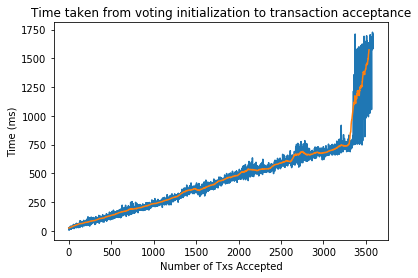

In [38]:
plt.title('Time taken from voting initialization to transaction acceptance')
plt.xlabel('Number of Txs Accepted')
plt.ylabel('Time (ms)')
plt.plot(list_time_from_init)
x_av = movingaverage(list_time_from_init, 50)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_init)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_init)," ms")
print("Number of accepted transactions: ", len(list_time_from_init))
plt.savefig(os.path.join(file_location,"res_acc_init.png"))

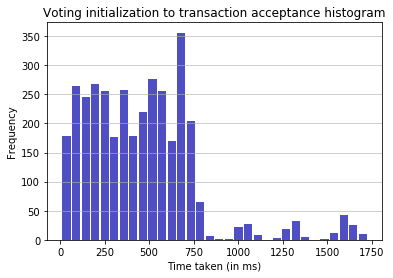

In [39]:
hist, bin_edges = np.histogram(list_time_from_init)
n, bins, patches = plt.hist(x=list_time_from_init, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting initialization to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Mean:  456.5447049637479  ms
Standard Deviation:  317.7700900116089  ms


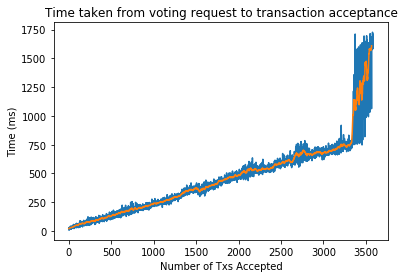

In [40]:
plt.title('Time taken from voting request to transaction acceptance')
plt.xlabel('Number of Txs Accepted')
plt.ylabel('Time (ms)')
plt.plot(list_time_from_req)
x_av = movingaverage(list_time_from_req, 20)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_req)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_req)," ms")

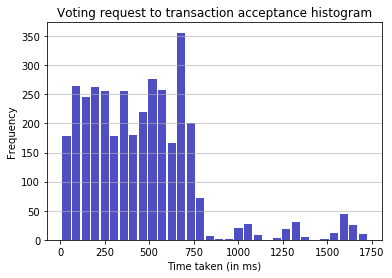

In [41]:
hist, bin_edges = np.histogram(list_time_from_req)
n, bins, patches = plt.hist(x=list_time_from_req, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting request to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Time taken for rejection of transaction due to previous transaction is not validated!

In [42]:
time_from_init = {}
time_from_req = {}
time_from_req_to_init = {}
for transactionID, time in history['REJ'].items():
    #print(transactionID)
    req_time = history['REQ'][transactionID]
    try:
        init_time = history['INIT'][transactionID]
    except KeyError:
        init_time = history['REC_INIT'][transactionID]
    time_from_init[transactionID] = (time-init_time).total_seconds()*1000
    time_from_req[transactionID] = (time-req_time).total_seconds()*1000
    time_from_req_to_init[transactionID] = (init_time-req_time).total_seconds()*1000

In [43]:
list_time_from_init = list(time_from_init.values())[1:]
list_time_from_req = list(time_from_req.values())[1:]

Mean:  489.2775587818697  ms
Standard Deviation:  65.62217831848483  ms
Number of rejected txs:  1413


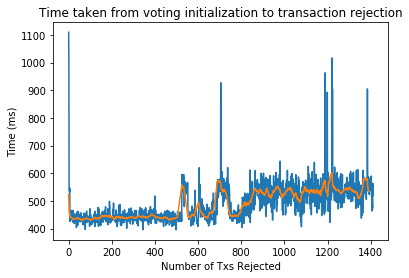

In [46]:
plt.title('Time taken from voting initialization to transaction rejection')
plt.xlabel('Number of Txs Rejected')
plt.ylabel('Time (ms)')
plt.plot(list_time_from_init)
x_av = movingaverage(list_time_from_init, 20)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_init)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_init)," ms")
print("Number of rejected txs: ", len(time_from_init))
plt.savefig(os.path.join(file_location,"res_rej.png"))